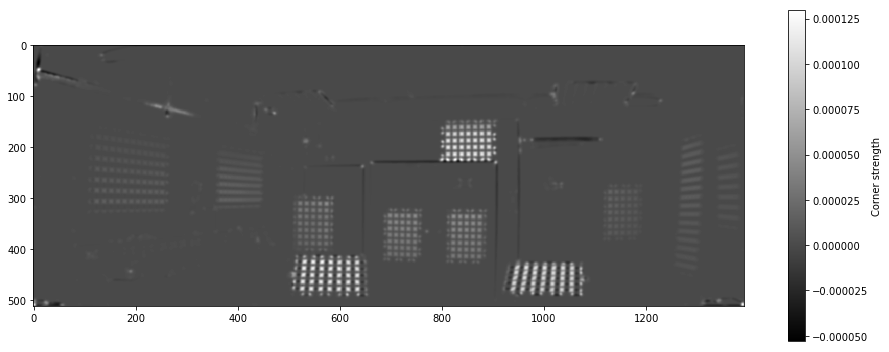

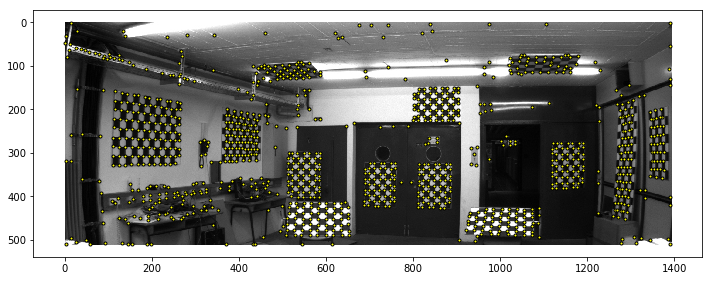

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from common import *

# Note: the sample image is naturally grayscale
I = rgb_to_gray(im2double(plt.imread('../data/calibration.jpg')))



 
###########################################
#
# Task 3.1: Compute the Harris-Stephens measure
#
###########################################
sigma_D = 1
sigma_I = 3
alpha = 0.06

Ix,Iy, _ = derivative_of_gaussian(I, sigma_D)

#Doing the gaussian of the derivatives is pretty much the same as weight convolvement between each derivative
DetA     = gaussian(Ix*Ix,sigma_I)*gaussian(Iy*Iy,sigma_I)-(gaussian(Ix*Iy,sigma_I))*(gaussian(Ix*Iy,sigma_I))
TraceA   = gaussian(Ix*Ix,sigma_I)+gaussian(Iy*Iy,sigma_I)

response = DetA - alpha*TraceA*TraceA

###########################################
#
# Task 3.4: Extract local maxima
#
###########################################
corners_y, corners_x= extract_local_maxima(response, 0.001)

###########################################
#
# Figure 3.1: Display Harris-Stephens corner strength
#
###########################################
plt.figure(figsize=(13,5))
plt.imshow(response,cmap="gray")
plt.colorbar(label='Corner strength')
plt.tight_layout()
#plt.savefig('out_corner_strength.png', bbox_inches='tight', pad_inches=0) # Uncomment to save figure in working directory

###########################################
#
# Figure 3.4: Display extracted corners
#
###########################################
plt.figure(figsize=(10,5))
plt.imshow(I, cmap='gray')
plt.scatter(corners_x, corners_y, linewidths=1, edgecolor='black', color='yellow', s=9)
plt.tight_layout()
plt.savefig('out_corners.png', bbox_inches='tight', pad_inches=0) # Uncomment to save figure in working directory

plt.show()


0.00012981055161785985